<a href="https://colab.research.google.com/github/Mahdi-Saadati/Machine-Learning-2/blob/main/5.b.%20AutoEncoder%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 124s 254ms/step - accuracy: 0.6795 - loss: 0.2174
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 259ms/step - accuracy: 0.8039 - loss: 0.1802
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 258ms/step - accuracy: 0.8090 - loss: 0.1498
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 256ms/step - accuracy: 0.8084 - loss: 0.1366
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 255ms/step - accuracy: 0.8087 - loss: 0.1300
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 253ms/step - accuracy: 0.8090 - loss: 0.1264
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 121s 257ms/step - accuracy: 0.8088 - loss: 0.1240
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 146s 266ms/step - accuracy: 0.8090 - loss: 0.1221
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 258ms/step - accuracy: 0.8087 - loss: 0.1209
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 254ms/step - accuracy: 0.8089 - loss: 0.1196
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step


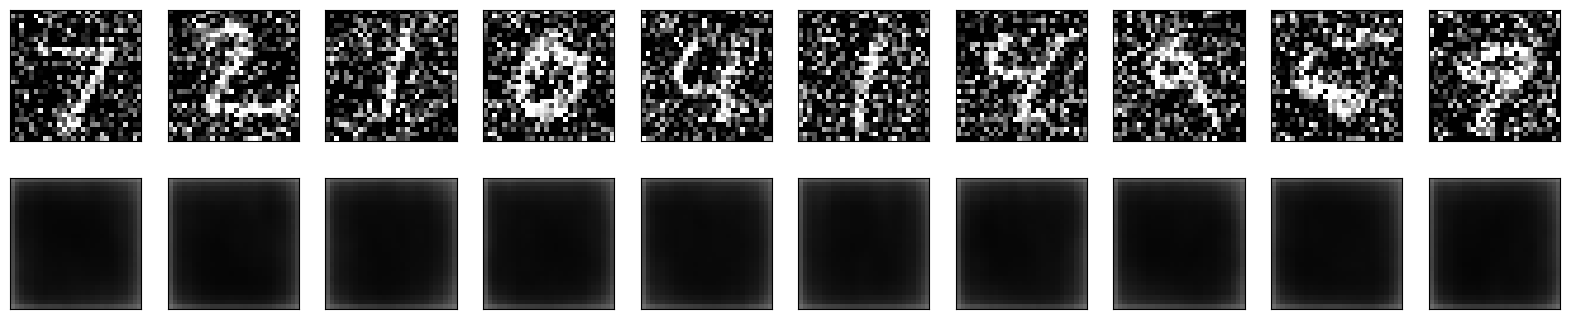

In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
from keras.datasets import mnist
from keras.optimizers import Adadelta
from keras import backend as K

(X_train, _), (X_test, _) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2])
    input_shape = (1, X_train.shape[1], X_train.shape[2])
else:
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
    input_shape = (X_train.shape[1], X_train.shape[2], 1)

X_train = (X_train - X_train.min())/(X_train.max() - X_train.min())
X_test = (X_test - X_test.min())/(X_test.max() - X_test.min())

### Adding noise to the training and testing images
C = 0.5
X_train_noisy = X_train + (C * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape))
X_test_noisy = X_test + (C * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape))

Model = Sequential()
Model.add(Conv2D(32, (3,3), padding='same', input_shape = input_shape, activation='relu'))
Model.add(MaxPooling2D((2,2), padding='same'))
Model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
Model.add(MaxPooling2D((2,2), padding='same'))
Model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
Model.add(UpSampling2D((2,2)))
Model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
Model.add(UpSampling2D((2,2)))
Model.add(Conv2D(1, (3,3), padding='same', activation='sigmoid'))

Model.summary()

Model.compile(optimizer= Adadelta(),
              loss = 'mse',
              metrics= ['accuracy'])

Model.fit(X_train_noisy, X_train, epochs=10, batch_size=128)

Reconstructed_images = Model.predict(X_test_noisy, batch_size=128)

n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    plt.subplot(2 , n, i + 1)
    plt.imshow(X_test_noisy[i,:,:,:].reshape((28,28)), cmap='gray', vmin=0, vmax=1)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2 , n, i + 1 + n)
    plt.imshow(Reconstructed_images[i,:,:,:].reshape((28,28)), cmap='gray', vmin=0, vmax=1)
    plt.xticks([])
    plt.yticks([])
plt.show()